#Lede Project 
##Data and databases
###topics, trends, and dimensional scaling
###Matthew L. Jones


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

import os
import sys
import traceback

Reading at scale: 


*Martha Ballard's Diary*
http://dohistory.org/diary/index.html

http://www.cameronblevins.org/posts/topic-modeling-martha-ballards-diary/



*Richmond Dispatch*

https://dsl.richmond.edu/dispatch/pages/home

Source: http://dlxs.richmond.edu/d/ddr/index.html



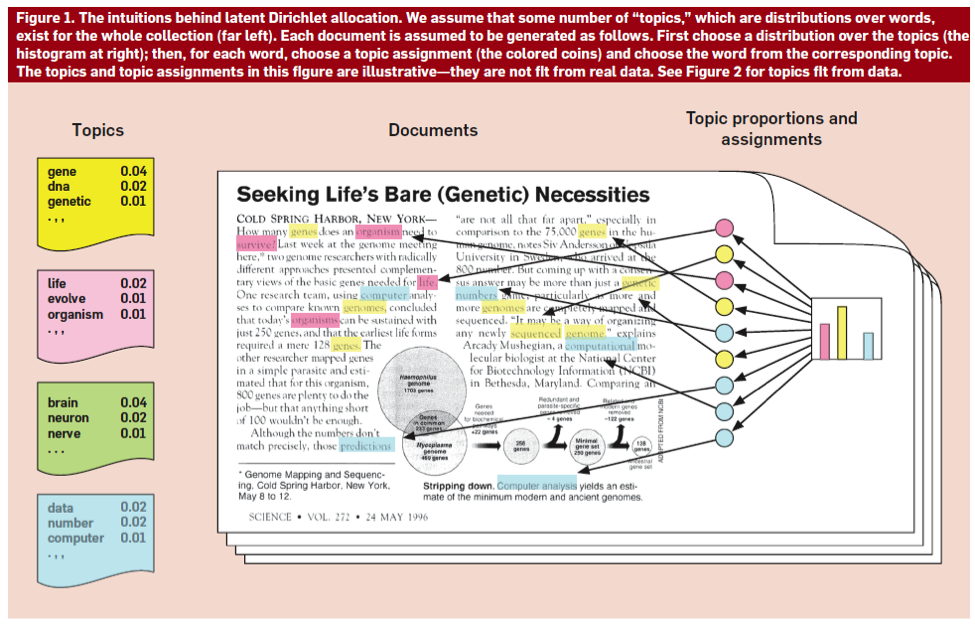

In [2]:
from IPython.display import Image
Image("http://journalofdigitalhumanities.org/wp-content/uploads/2013/02/blei_lda_illustration.png")



Assuming that you are storing your data in a directory in the same place as your iPython notebook.

#Let's look at Victorian novels for a little while

First, we'll need to read in plain text files.

In [3]:
def readtextfiles(our_directory):
	"""reads in plain text files and puts them in order in a list"""
	current_dir=os.getcwd()    #should build up file names using os.path()
	os.chdir(our_directory)
	files=[file for file in os.listdir(".") if not file.startswith('.')] #defeat hidden files
	files=[file for file in files if not os.path.isdir(file)==True] #defeat directories

	articles=[]
	for file in files:
	    with open(file) as plaintext:   #not doing anything about encoding, could be problem
	        lines=plaintext.readlines()
	        article=" ".join(lines) #alter lines if want to skip lines
	        articles.append(article) #you might want to extract the file name to use; how do it?
	os.chdir(current_dir)
	return articles, files

In [4]:
our_texts, names=readtextfiles("text_examples/british-fiction-corpus")

In [5]:
names

['Dickens_David.txt',
 'Austen_Sense.txt',
 'Dickens_Bleak.txt',
 'CBronte_Jane.txt',
 'CBronte_Villette.txt',
 'ABronte_Agnes.txt',
 'Austen_Emma.txt',
 'Austen_Pride.txt',
 'ABronte_Tenant.txt',
 'CBronte_Professor.txt',
 'Dickens_Hard.txt']

In [6]:
def data_cleanse(docs_to_clean):
	import re
	D=len(docs_to_clean)
	for d in range(0, D):
	    docs_to_clean[d] = docs_to_clean[d].lower()
	    docs_to_clean[d] = re.sub(r'-', ' ', docs_to_clean[d])
	    docs_to_clean[d] = re.sub(r'[^a-zA-Z0-9 ]', '', docs_to_clean[d])
	    docs_to_clean[d] = re.sub(r' +', ' ', docs_to_clean[d])
	    docs_to_clean[d] = re.sub(r'\s\w\s', ' ', docs_to_clean[d]) #eliminate single letters
	return docs_to_clean

#You'll need to modify this as necessary!


In [7]:
our_texts=data_cleanse(our_texts)
#more necessary when have messy text
#eliminate escaped characters

####back to `vectorizer` from `scikit learn`

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
vectorizer=TfidfVectorizer(min_df=0.5, stop_words='english', use_idf=True)

In [10]:
document_term_matrix=vectorizer.fit_transform(our_texts)

In [11]:
# now let's get our vocabulary--the names corresponding to the rows
vocab=vectorizer.get_feature_names()


In [12]:
len(vocab)

7102

In [13]:
document_term_matrix.shape

(11, 7102)

In [14]:
document_term_matrix_dense=document_term_matrix.toarray()


In [15]:
dtmdf=pd.DataFrame(document_term_matrix_dense, columns=vocab)

In [16]:
dtmdf

,18,abandoned,abashed,abhorred,abhorrence,abide,abilities,ability,able,abode,...,youd,youll,young,younger,youngest,youre,youth,youthful,youve,zeal
0,0.000267,0.002905,0.001869,0.000000,0.000488,0.000223,0.002235,0.001219,0.007115,0.001320,...,0.004916,0.015798,0.049804,0.003124,0.001788,0.012290,0.005380,0.004309,0.004146,0.000244
1,0.000989,0.000827,0.000000,0.001805,0.003611,0.000000,0.007444,0.002708,0.029546,0.003491,...,0.000000,0.000000,0.066158,0.003854,0.003308,0.000000,0.004496,0.001519,0.000000,0.001805
2,0.000000,0.002917,0.001341,0.000000,0.000245,0.000000,0.000898,0.000980,0.012721,0.000758,...,0.003366,0.013598,0.074407,0.003137,0.001571,0.021317,0.005750,0.003296,0.004163,0.000000
3,0.000000,0.004706,0.000000,0.003210,0.000000,0.001176,0.000588,0.000000,0.010506,0.003972,...,0.002353,0.004321,0.037001,0.006395,0.000588,0.002941,0.007766,0.001620,0.005778,0.002568
4,0.000724,0.001212,0.001448,0.000661,0.001323,0.000606,0.000000,0.001323,0.007529,0.002558,...,0.000606,0.001669,0.053176,0.000941,0.003636,0.000606,0.012706,0.002782,0.000000,0.001323
5,0.000000,0.000000,0.001862,0.000000,0.001700,0.000000,0.003115,0.003400,0.025401,0.011833,...,0.004673,0.010011,0.081041,0.015724,0.001558,0.017133,0.003629,0.000000,0.011900,0.000000
6,0.000000,0.000000,0.000000,0.000570,0.000000,0.000522,0.001567,0.000000,0.029214,0.000441,...,0.000000,0.000000,0.077904,0.000811,0.002090,0.000000,0.004463,0.000959,0.000000,0.002281
7,0.000910,0.000000,0.000000,0.000000,0.004986,0.000761,0.004568,0.000000,0.031930,0.005142,...,0.000000,0.000699,0.076278,0.017739,0.009898,0.000000,0.005322,0.000000,0.000000,0.000000
8,0.000789,0.005939,0.000000,0.002161,0.004322,0.001980,0.000000,0.000000,0.017937,0.004457,...,0.010559,0.021208,0.047150,0.004612,0.000000,0.027717,0.006662,0.001818,0.015846,0.000720
9,0.003283,0.001373,0.001641,0.005996,0.000000,0.001373,0.000000,0.001499,0.008532,0.006956,...,0.004120,0.016393,0.061858,0.002133,0.000000,0.016480,0.012798,0.006305,0.011992,0.000000


####While this data frame is lovely to look at and useful to think with, it's tough on your computer's memory

In [17]:
#easy to program, but let's use a robust version from sklearn!
from sklearn.metrics.pairwise import cosine_similarity

In [18]:
similarity=cosine_similarity(document_term_matrix)

#Note here that the `cosine_similiary` can take 
#an entire matrix as its argument

In [19]:
similarity_df=pd.DataFrame(similarity, index=names, columns=names)

##that is a *symmetrical* matrix relating each of the texts (rows) to another text (row) 

In [20]:
similarity_df.ix[1].order(ascending=False)

Austen_Sense.txt         1.000000
Austen_Pride.txt         0.828285
Austen_Emma.txt          0.801833
ABronte_Tenant.txt       0.777003
ABronte_Agnes.txt        0.750176
CBronte_Jane.txt         0.739302
CBronte_Villette.txt     0.713728
Dickens_David.txt        0.704389
Dickens_Hard.txt         0.698309
CBronte_Professor.txt    0.671603
Dickens_Bleak.txt        0.666095
Name: Austen_Sense.txt, dtype: float64

##can do lots of things with similarity matrix

you've already seen hierarchical clustering

##Multidimension scaling

- Technique to visualize distances in high dimensional spaces in ways we can cognize.
- Keep distances but reduce dimensionality

In [21]:
#here's the blackbox
from sklearn.manifold import MDS
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
positions= mds.fit_transform(1-similarity)

In [22]:
positions.shape

(11, 2)

It's an 11 by 2 matrix

OR

simply an (x,y) coordinate pair for each of our texts

In [23]:
def plot_mds(positions, names):
	xs, ys=positions[:, 0], positions[:, 1]
	for x, y, name in zip(xs, ys, names):
	    plt.scatter(x,y)
	    plt.text(x,y,name)
	plt.show()


/home/mljones/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family [u'monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


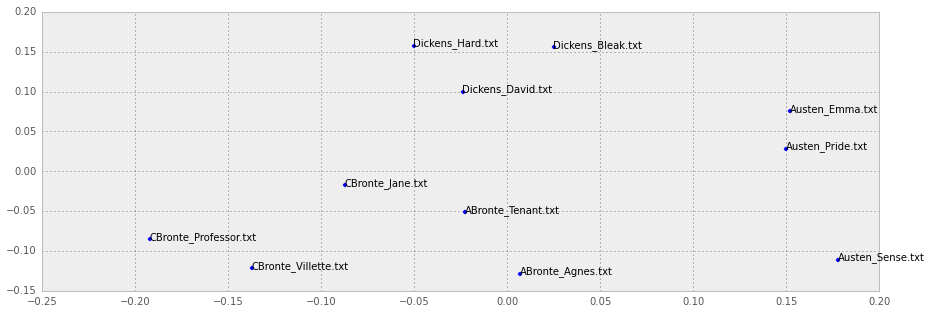

In [24]:
#let's plot it: I've set up a black box
plot_mds(positions,names)

In [25]:
names=[name.replace(".txt", "") for name in names]

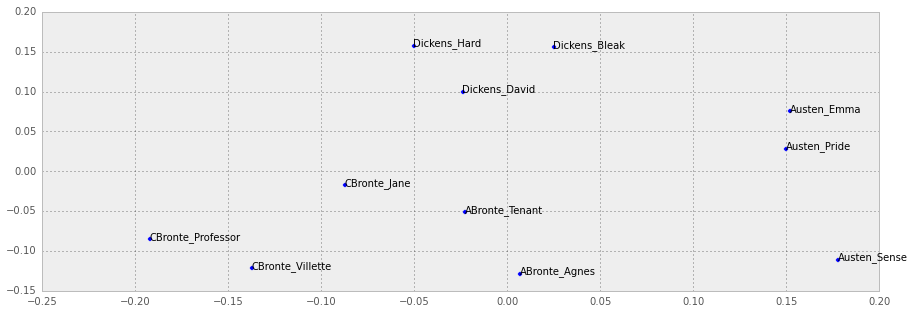

In [26]:
plot_mds(positions,names)

What has this got us?

It suggests that even this crude measure of similarity is able to capture something significant.

Note: the axes don't really *mean* anything

#interesting but what does it mean?


#topic modeling
##unsupervised algorithm for finding the major topics of texts
###unlike hierarchical clustering, assumes texts spring from multiple sets of topics
###the big thing in much text modeling, from humanities, to Facebook, to NSA
###many variations

#fantastic `python` package `gensim`
"corpora" = a collection of documents or texts

`gensim` likes its documents to be a list of lists of words, not a list of strings

Get the stoplist in the data directory in my github.

In [27]:
our_texts, names=readtextfiles("text_examples/PCCIPtext")

In [28]:
names

['280_EO12977_1995.txt',
 '249_OTAHoldingtheEdgeAppendices.txt',
 '332_S106InternetSecurityandPrivacy.txt',
 '467_GAOElectronidWarfareRadarWarnings28pp.txt',
 '202_CIPBoard21StepsBooklet.txt',
 '39_ClintonPolicyCIP_PDD63.txt',
 '487_GAOElectronicWarefareAFInadequacies34pp.txt',
 '452_Govt Activities to Protect Elec Grid.2.4.05.txt',
 '501_GAOAdequacyInfoDefenseIndBasetestimony14pp.txt',
 '80_cip_report_1.11.txt',
 '428_GAOMaintainingMilitaryPresenceinIndustrialEnviron62pp.txt',
 '117_cip_report_2.8.txt',
 '245_OTAElectronicSurveillance.txt',
 '6_RL30153.txt',
 '536_GAOFEMAProgressResponse.txt',
 '246_OTAElectronicSurveillanceDigitalAge.txt',
 '396_GAOTerrorismInsurance022702.txt',
 '12_WinningtheWaronTerror.txt',
 '541_GAOIndustryChemFacilitiesSecurity.txt',
 '438_GAODefenseIndustrialBase198115pp.txt',
 '201_CIAOPracticesforSecuringCIassets.txt',
 '9_GAOChallengesreport.txt',
 '103_cip_report_2.10.txt',
 '436_GAODODIndustrialPreparednessProgramNeeds60pp.txt',
 '123_HartRudmanPhaseIIIAd

In [29]:
our_texts=data_cleanse(our_texts)

In [30]:
#improved stoplist--may be too complete
stop=[]
with open('stoplist-multilingual') as f:
    stop=f.readlines()
    stop=[word.strip('\n') for word in stop]

In [31]:
texts = [[word for word in document.lower().split() if word not in stop] for document in our_texts] #gensim requires list of list of words in documents

In [32]:
from gensim import corpora, models, similarities, matutils
"""gensim includes its own vectorizing tools"""
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]



##doc2bow just means `doc`uments to `b`ag `o`f `w`ords
##ok, this has just vectorized our texts; it's another form

##Now we are going to call the topic modeling black box
###the key parameter is *how many* distinct topics we want the computer to find
####this will take a while


In [33]:
number_topics=40
model = models.LdaMulticore(corpus, id2word=dictionary, num_topics=number_topics, passes=10)
#multicore faster but seems to crash more in my experience
# alternatively, for single core process
#model=models.LdaModel(corpus, id2word=dictionary, num_topics=number_topics, passes=10)

In [34]:
model.show_topics()

[u'0.011*interoperability + 0.011*technology + 0.009*assessment + 0.007*joint + 0.006*air + 0.006*services + 0.006*hr + 0.006*dr + 0.005*c3 + 0.005*public',
 u'0.014*federal + 0.013*security + 0.011*agencies + 0.010*government + 0.010*agency + 0.009*technology + 0.008*national + 0.008*management + 0.007*data + 0.007*systems',
 u'0.010*fbi + 0.009*department + 0.009*training + 0.008*local + 0.007*terrorist + 0.007*federal + 0.007*crime + 0.006*terrorism + 0.006*agencies + 0.006*law',
 u'0.008*technology + 0.008*security + 0.007*government + 0.007*national + 0.006*defense + 0.005*software + 0.005*program + 0.004*systems + 0.004*industry + 0.004*development',
 u'0.016*stockpile + 0.014*dod + 0.008*materials + 0.006*national + 0.005*year + 0.005*data + 0.004*market + 0.004*sensitivity + 0.004*percent + 0.004*material',
 u'0.000*vought + 0.000*renical + 0.000*regi + 0.000*regul + 0.000*rei + 0.000*rej + 0.000*rel + 0.000*remi + 0.000*reoubl + 0.000*responsi',
 u'0.008*6633 + 0.007*y2k + 0.0

In [36]:
model.show_topics(number_topics,10,formatted=False)[:4]

[[(1.4033118158854899e-05, u'vought'),
  (1.4033118158854899e-05, u'renical'),
  (1.4033118158854899e-05, u'regi'),
  (1.4033118158854899e-05, u'regul'),
  (1.4033118158854899e-05, u'rei'),
  (1.4033118158854899e-05, u'rej'),
  (1.4033118158854899e-05, u'rel'),
  (1.4033118158854899e-05, u'remi'),
  (1.4033118158854899e-05, u'reoubl'),
  (1.4033118158854899e-05, u'responsi')],
 [(0.011278903088321071, u'security'),
  (0.010713988785028378, u'privacy'),
  (0.010062427105057696, u'data'),
  (0.0096337561024090971, u'systems'),
  (0.0087066129030076694, u'electronic'),
  (0.0067674206434191562, u'federal'),
  (0.0065141373728968095, u'law'),
  (0.0064956018808460221, u'government'),
  (0.0054754369260244041, u'technology'),
  (0.0053667785813350929, u'public')],
 [(0.0016946640945281974, u'stall'),
  (0.0012738158095899597, u'comma'),
  (0.00085272813758866569, u'combatants'),
  (0.00085272813758866569, u'cdn'),
  (0.00085272813758866569, u'platoon'),
  (0.00085272813758866569, u'caliber'

In [37]:
topics_indexed=[[b for (a,b) in topics] for topics in model.show_topics(number_topics,10,formatted=False)]


In [38]:
topics_indexed=pd.DataFrame(topics_indexed)

In [39]:
topics_indexed

,0,1,2,3,4,5,6,7,8,9
0,vought,renical,regi,regul,rei,rej,rel,remi,reoubl,responsi
1,security,privacy,data,systems,electronic,federal,law,government,technology,public
2,stall,comma,combatants,cdn,platoon,caliber,060859,062051,chap,9004
3,defense,production,base,military,future,industrial,technology,maintenance,government,systems
4,vought,renical,regi,regul,rei,rej,rel,remi,reoubl,responsi
5,federal,security,agencies,government,agency,technology,national,management,data,systems
6,vought,renical,regi,regul,rei,rej,rel,remi,reoubl,responsi
7,00,nsc,stockpile,study,defense,goals,materials,assumptions,proposed,foreign
8,security,dod,homeland,defense,guard,national,missions,dsb,support,technology
9,terrorism,weapons,panel,terrorist,national,biological,federal,threat,1999,terrorists


So which topics most significant for each document?
Pass a bag of words version of each document to the model.

In [40]:
model[dictionary.doc2bow(texts[1])]

[(3, 0.19718915678001858), (29, 0.79207183594768116)]

Let's find them for every document--with a list comprehension, of course

In [41]:
primarytopics=[model[dictionary.doc2bow(text)] for text in texts]

make it pretty with a list comprehension

In [42]:
import numpy as np
primarytopics_matrix=pd.DataFrame(np.matrix([matutils.sparse2full(primarytopic, number_topics) for primarytopic in primarytopics]))

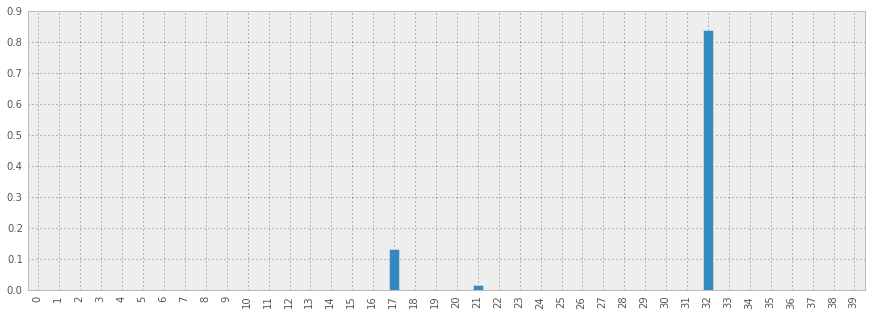

In [43]:
primarytopics_matrix.ix[18].plot(kind="bar")

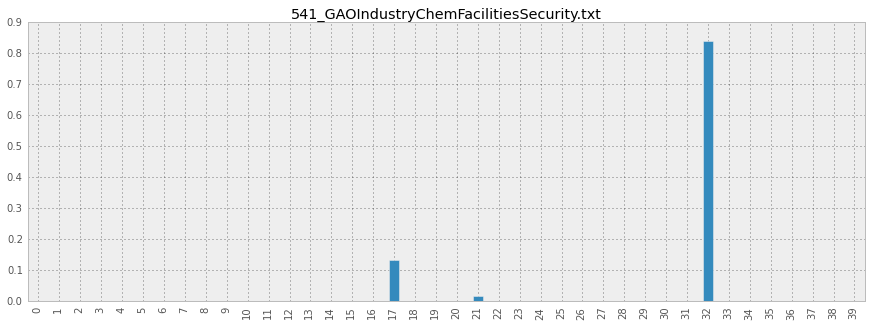

In [44]:
primarytopics_matrix.ix[18].plot(kind="bar", title=names[18])

In [45]:
topics_indexed.ix[[17,21,32]]

,0,1,2,3,4,5,6,7,8,9
17,infrastructure,critical,security,national,sector,government,cyber,protection,systems,private
21,food,terrorism,bioterrorism,biological,1999,agriculture,national,agricultural,federal,emergency
32,gao,federal,security,pki,agencies,facilities,chemical,water,key,systems


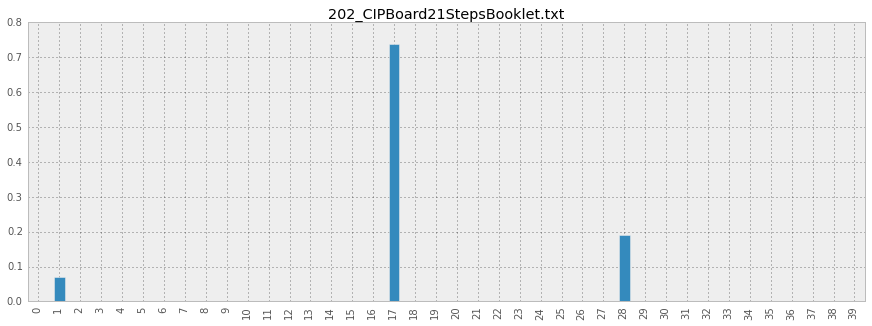

In [47]:
primarytopics_matrix.ix[4].plot(kind="bar", title=names[4])

In [48]:
topics_indexed.ix[[1,17,28]]

,0,1,2,3,4,5,6,7,8,9
1,security,privacy,data,systems,electronic,federal,law,government,technology,public
17,infrastructure,critical,security,national,sector,government,cyber,protection,systems,private
28,security,homeland,cip,report,national,project,infrastructure,2003,risk,critical


#FIND which documents focus on a particular topic

In [49]:
topics_indexed.ix[28]

0          security
1          homeland
2               cip
3            report
4          national
5           project
6    infrastructure
7              2003
8              risk
9          critical
Name: 28, dtype: object

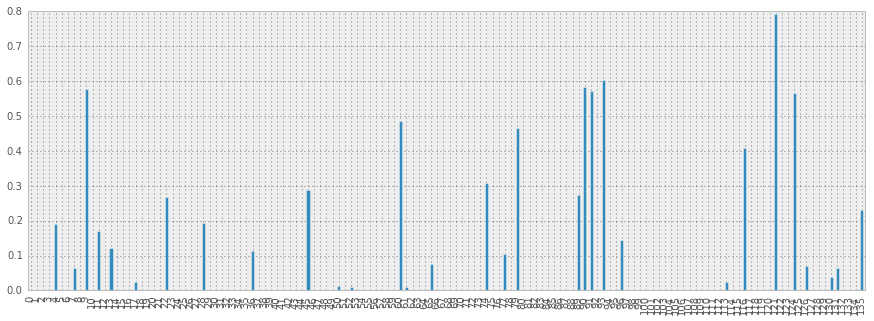

In [50]:
primarytopics_matrix[28].plot(kind="bar")

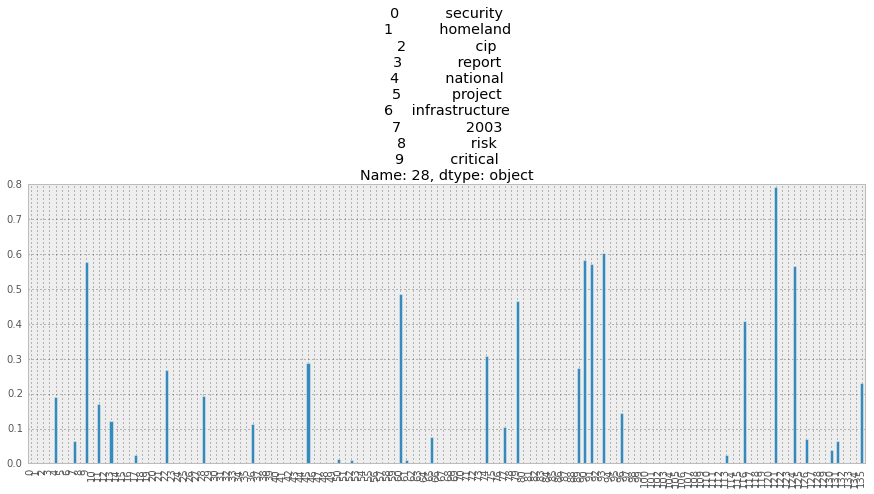

In [53]:
primarytopics_matrix[28].plot(kind="bar", title=str(topics_indexed.ix[28]))

In [ ]:
#that's ugly!